In [2]:
import numpy as np
import dbdreader
import pandas as pd
import matplotlib.pyplot as plt

data_files = '/Users/gong/oceansensing Dropbox/C2PO/PASSENGERS/2023_glider_data/sylvia-20230608-passengers/from-glider/realtime/sylvia-from-glider-20230610T114112/*.[s|t]bd'
cac_dir = '/Users/gong/oceansensing Dropbox/C2PO/PASSENGERS/2023_glider_data/sylvia-20230608-passengers/from-glider/cache'

dbd = dbdreader.MultiDBD(pattern=data_files,cacheDir=cac_dir) 

print("we the following science parameters:")
for i,p in enumerate(dbd.parameterNames['sci']):
    print("%2d: %s"%(i,p))
print("\nand engineering parameters:")
for i,p in enumerate(dbd.parameterNames['eng']):
    print("%2d: %s"%(i,p))

we the following science parameters:
 0: sci_ctd41cp_timestamp
 1: sci_echosndr853_ping_count
 2: sci_m_present_secs_into_mission
 3: sci_m_present_time
 4: sci_water_cond
 5: sci_water_pressure
 6: sci_water_temp

and engineering parameters:
 0: c_alt_time
 1: c_ballast_pumped
 2: c_climb_target_depth
 3: c_de_oil_vol
 4: c_dive_target_depth
 5: c_fin
 6: c_heading
 7: c_science_send_all
 8: c_thruster_on
 9: c_weight_drop
10: c_wpt_lat
11: c_wpt_lon
12: c_wpt_x_lmc
13: c_wpt_y_lmc
14: f_fin_offset
15: f_ocean_pressure_max
16: f_ocean_pressure_min
17: m_avg_climb_rate
18: m_avg_dive_rate
19: m_avg_speed
20: m_ballast_pumped
21: m_battery_inst
22: m_battpos
23: m_bms_aft_current
24: m_bms_ebay_current
25: m_bms_emergency_battery_voltage
26: m_bms_pitch_current
27: m_comms_tickle_timestamp
28: m_cop_tickle_timestamp
29: m_coulomb_amphr
30: m_coulomb_amphr_total
31: m_de_oil_vol
32: m_depth
33: m_depth_rate_avg_final
34: m_digifin_leakdetect_reading
35: m_dip_angle
36: m_fin
37: m_final_

In [6]:
def make_df(sensor_list,dbd):
    tm,sensor_title=dbd.get(sensor_list[0])
    sensor0_time_pair = np.column_stack((tm, sensor_title))
    sensor0_time_pair[:,0] = pd.to_datetime(sensor0_time_pair[:,0], unit='s')
    df = pd.DataFrame(sensor0_time_pair,columns=['time',sensor_list[0]])
    df['time'] = pd.to_datetime(df['time'])

    for sensor_titles in sensor_list[1:]:
        dbd=dbdreader.MultiDBD(pattern=data_files,cacheDir=cac_dir)    
        tm,sensor_data=dbd.get(sensor_titles)
        sensor_time_pair = np.column_stack((tm, sensor_data))
        sensor_time_pair[:,0] = pd.to_datetime(sensor_time_pair[:,0], unit='s')
        sensor_time_df = pd.DataFrame(sensor_time_pair,columns=['time',sensor_titles])
        sensor_time_df['time'] = pd.to_datetime(sensor_time_df['time'])
        df = df.merge(sensor_time_df, on='time', how='outer').sort_values(by='time')
        df = df.reset_index(drop=True)

    return df

sci_sensors = ['sci_ctd41cp_timestamp','sci_m_present_time','sci_water_pressure','sci_water_temp','sci_water_cond']
gli_sensors = ['m_present_time','m_pressure','m_pitch','m_roll']

sci_data = make_df(sci_sensors,dbd)
gli_data = make_df(gli_sensors,dbd)

sci_data = sci_data[sci_data['sci_ctd41cp_timestamp'].ne(0)]

In [7]:
sci_data

,time,sci_ctd41cp_timestamp,sci_m_present_time,sci_water_pressure,sci_water_temp,sci_water_cond
1,2023-06-09 22:16:42.385345536,1.686349e+09,1.686349e+09,0.004,25.322701,5.49459
2,2023-06-09 22:16:49.399749632,1.686349e+09,1.686349e+09,0.004,25.317600,5.49271
3,2023-06-09 22:16:55.422057984,1.686349e+09,1.686349e+09,0.006,25.323000,5.49268
4,2023-06-09 22:17:02.435272192,1.686349e+09,1.686349e+09,0.032,25.327299,5.49301
5,2023-06-09 22:17:08.453216512,1.686349e+09,1.686349e+09,0.062,25.324600,5.49788
...,...,...,...,...,...,...
8368,2023-06-10 10:42:44.333465600,1.686394e+09,1.686394e+09,NaN,NaN,NaN
8369,2023-06-10 10:42:49.386321920,NaN,1.686394e+09,-0.002,25.076799,5.46524
8370,2023-06-10 10:42:50.390350336,1.686394e+09,1.686394e+09,NaN,NaN,NaN
8371,2023-06-10 10:42:55.412353536,NaN,1.686394e+09,0.001,25.068199,5.46382


In [8]:
gli_data

,time,m_present_time,m_pressure,m_pitch,m_roll
0,2023-06-09 21:35:18.931793152,1.686347e+09,NaN,NaN,NaN
1,2023-06-09 21:35:45.460601856,1.686347e+09,NaN,NaN,NaN
2,2023-06-09 21:35:50.444732672,1.686347e+09,NaN,NaN,NaN
3,2023-06-09 21:35:55.397125120,1.686347e+09,NaN,NaN,NaN
4,2023-06-09 21:36:00.343383808,1.686347e+09,NaN,NaN,NaN
...,...,...,...,...,...
2240,2023-06-10 10:41:35.099212544,1.686394e+09,NaN,NaN,NaN
2241,2023-06-10 10:41:48.848113920,1.686394e+09,NaN,NaN,NaN
2242,2023-06-10 10:42:07.221649152,1.686394e+09,NaN,NaN,NaN
2243,2023-06-10 10:42:16.831756544,1.686394e+09,NaN,NaN,NaN


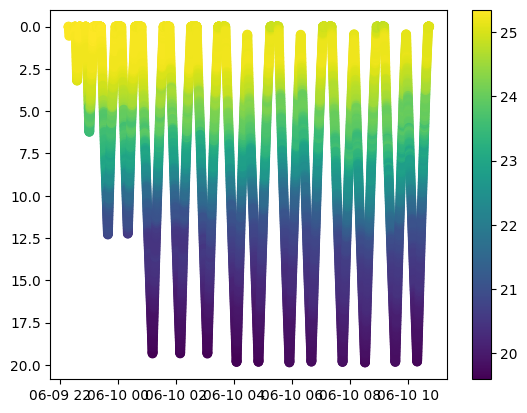

In [9]:
plt.scatter(sci_data['time'],sci_data['sci_water_pressure'], c=sci_data['sci_water_temp'])
ax = plt.gca()
ax.invert_yaxis()
plt.colorbar()